In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 

In [2]:
dataframe1 = pd.read_csv("Dataset.txt")
  
                                       # storing this dataframe in a csv file

dataframe1.to_csv('new_Dataset.csv', 
                  index = None)

In [3]:

df =  pd.read_csv('new_Dataset.csv')

In [4]:
df.shape

(125973, 43)

In [5]:
# code to see all the columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [7]:
# df.columns.tolist()

In [8]:
# df.isnull().sum()           #count number of null values in data set
df['protocol_type'].value_counts()
# df['attack_category'].value_counts()
# df['flag'].value_counts()
# df['service'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [9]:

new_df1 =  pd.get_dummies(df,columns = ['protocol_type','flag'],drop_first=True) # we will use drop_first to remove the multicolinearity issue 

In [10]:
new_df1.head()

,duration,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,ftp_data,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,1,0,0,0,0,0,0,0,0,0,1,0
1,0,other,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0,1,0,0,0,0,0,0,0,0,1,0
2,0,private,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1,0,0,0,0,0,1,0,0,0,0,0
3,0,http,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,1,0,0,0,0,0,0,0,0,0,1,0
4,0,http,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,1,0,0,0,0,0,0,0,0,0,1,0


In [11]:

# Calculate the value counts for each class
count = new_df1['service'].value_counts()

In [12]:
# Define the threshold
threshold = 1000

In [13]:

# Replace the classes with count below the threshold with 'other_categories'
count[count < threshold] = 'other_services'

# Get the class names that are above the threshold
rep = count[count != 'other_services'].index

# Create a new column with the updated classes
new_df1['new_service_category'] = new_df1['service'].apply(lambda x: x if x in rep else 'other_services')

# Convert the new column into dummy variables
new_df2 = pd.get_dummies(new_df1['new_service_category'])

In [14]:

new_df2.head(10)
# new_df1.head(7)

,domain_u,eco_i,ecr_i,finger,ftp,ftp_data,http,other,other_services,private,smtp,telnet
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:

new_df1[['domain_u', 'eco_i', 'ecr_i', 'ftp_data','http','other','other_services','private','smtp']] = new_df2[['domain_u', 'eco_i', 'ecr_i', 'ftp_data','http','other','other_services','private','smtp']].values


In [16]:
new_df1.head()

,duration,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,new_service_category,domain_u,eco_i,ecr_i,ftp_data,http,other,other_services,private,smtp
0,0,ftp_data,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,1,0,0,0,0,0,0,0,0,0,1,0,ftp_data,0,0,0,1,0,0,0,0,0
1,0,other,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0,1,0,0,0,0,0,0,0,0,1,0,other,0,0,0,0,0,1,0,0,0
2,0,private,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1,0,0,0,0,0,1,0,0,0,0,0,private,0,0,0,0,0,0,0,1,0
3,0,http,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,1,0,0,0,0,0,0,0,0,0,1,0,http,0,0,0,0,1,0,0,0,0
4,0,http,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,1,0,0,0,0,0,0,0,0,0,1,0,http,0,0,0,0,1,0,0,0,0


In [17]:
new_df1['new_service_category'].value_counts()

http              40338
other_services    22670
private           21853
domain_u           9043
smtp               7313
ftp_data           6860
eco_i              4586
other              4359
ecr_i              3077
telnet             2353
finger             1767
ftp                1754
Name: new_service_category, dtype: int64

In [18]:
df = new_df1.drop(['service', 'new_service_category'], axis=1)

In [19]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,domain_u,eco_i,ecr_i,ftp_data,http,other,other_services,private,smtp
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [20]:


dataframe1 = pd.read_csv("Attack_types.txt")
  
                                       # storing this dataframe in a csv file

dataframe1.to_csv('new_Attack_types.csv', 
                  index = None)

In [21]:

df2 =  pd.read_csv('new_Attack_types.csv')

In [22]:

df2.head()
# df4['attack_type']

,attack_category,attack_type
0,apache2,dos
1,back,dos
2,mailbomb,dos
3,processtable,dos
4,snmpgetattack,dos


In [23]:

cat_to_type = dict(zip(df2['attack_category'], df2['attack_type']))


# use the dictionary to replace attack_category values in df1 with attack_type values from df2
# cat_to_type.keys

In [24]:
cat_to_type

{'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [25]:
df['attack_category'] = df['attack_category'].map(cat_to_type)

# print the updated df1
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,domain_u,eco_i,ecr_i,ftp_data,http,other,other_services,private,smtp
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,NaN,20,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,NaN,15,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,19,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,NaN,21,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,21,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [26]:
df['attack_category'].value_counts()

dos      45927
probe    11656
r2l        995
u2r         52
Name: attack_category, dtype: int64

In [27]:
df['attack_category'].fillna("normal", inplace=True)

In [28]:

df['attack_category'].value_counts()

normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: attack_category, dtype: int64

In [29]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,domain_u,eco_i,ecr_i,ftp_data,http,other,other_services,private,smtp
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,19,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0



 # Now Lets do label encoding on Target column

In [30]:

# create a LabelEncoder object
le = LabelEncoder()

# fit the encoder to the 'category' column and transform it
df['attack_category'] = le.fit_transform(df['attack_category'])

In [31]:
df['attack_category'].value_counts()

1    67343
0    45927
2    11656
3      995
4       52
Name: attack_category, dtype: int64

In [32]:

df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,domain_u,eco_i,ecr_i,ftp_data,http,other,other_services,private,smtp
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1,20,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1,15,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0,19,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1,21,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,21,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


# Now lets handle Outliers if any using percentile method

In [33]:

dataset = sorted(df['duration'])

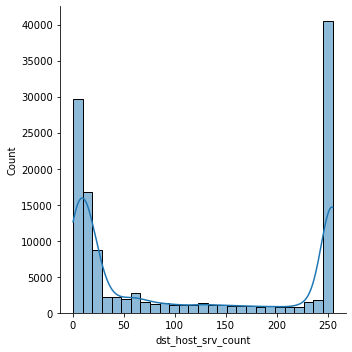

In [34]:
sns.displot(df['dst_host_srv_count'],kde=True)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dst_host_same_src_port_rate'>

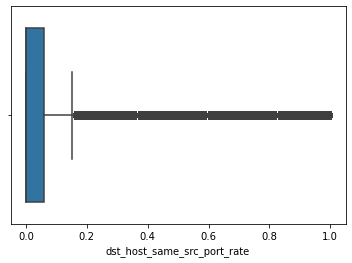

In [35]:

sns.boxplot(df['dst_host_same_src_port_rate'])

In [36]:
upper_limit = df['src_bytes'].quantile(0.99)
upper_limit

54540.0

In [37]:
lower_limit = df['src_bytes'].quantile(0.01)
lower_limit

0.0

In [38]:
# df[(df['src_bytes'] >= upper_limit) | (df['src_bytes'] <= lower_limit)]

## Finding Corlation with other matrices

In [41]:
df.corr()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,domain_u,eco_i,ecr_i,ftp_data,http,other,other_services,private,smtp
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,0.052791,0.087183,0.045519,0.099116,-0.001593,0.070420,NaN,-0.000258,0.000440,-0.079042,-0.039470,-0.069873,-0.069510,0.200682,0.199961,0.074681,-0.013738,-0.040158,0.050570,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,0.161693,-0.156311,-0.004643,0.027974,-0.034493,-0.005336,0.034268,0.539954,-0.068182,-0.005943,-0.003411,0.001148,-0.068255,-0.005119,-0.029668,-0.021429,-0.017445,-0.021698,-0.075233,0.172513,-0.027083,0.091378,-0.026093
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,-0.000272,-0.000186,-0.000093,-0.000179,-0.000134,-0.000309,NaN,-0.000022,-0.000742,-0.005152,-0.002792,-0.003228,-0.003438,0.013782,0.013975,0.003899,-0.000432,-0.002608,-0.005791,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,0.013482,-0.022592,0.003683,-0.002849,-0.002429,0.007609,0.178046,-0.000685,-0.004800,0.000007,-0.000229,0.000682,-0.006079,-0.000360,-0.002157,-0.001508,-0.001205,0.003377,-0.005152,-0.001083,-0.000524,0.000614,-0.000561
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,0.001069,0.001133,0.001229,0.000089,-0.000083,0.000339,NaN,-0.000008,-0.000421,-0.003543,-0.001754,-0.003059,-0.003038,0.011176,0.011052,0.003788,-0.001703,-0.001674,0.002528,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,0.008763,-0.018076,0.002337,-0.001801,-0.001539,-0.000537,-0.000141,0.029685,-0.003042,0.000147,0.000215,-0.000077,-0.004509,-0.000228,-0.001362,-0.000956,-0.000778,-0.000260,-0.002607,0.013219,-0.002195,0.001921,-0.001199
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,-0.000516,-0.000344,-0.000174,-0.000369,-0.000262,-0.000581,NaN,-0.000040,-0.001374,-0.009837,-0.005031,0.021734,0.022614,-0.004096,-0.005275,0.008739,-0.001551,0.038102,-0.025499,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.010021,-0.037038,0.006709,-0.005178,-0.004408,-0.001579,-0.000403,-0.001972,0.022781,-0.000759,-0.000448,-0.000278,-0.017074,-0.000654,-0.003918,-0.002738,-0.002229,-0.003381,-0.009670,-0.002667,-0.006600,-0.006455,-0.003498
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,-0.003280,-0.002187,-0.001108,-0.002343,-0.001665,-0.003689,NaN,-0.000252,-0.008728,-0.020819,0.024457,-0.043316,-0.056549,-0.033052,-0.033507,0.054759,-0.026638,-0.026247,0.041056,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,-0.101976,-0.157130,-0.187927,0.224319,-0.027999,-0.010027,-0.002560,-0.012526,-0.055342,-0.004824,-0.002843,-0.001765,0.073840,-0.004155,-0.024886,-0.017394,0.026001,-0.021475,-0.061417,-0.016942,-0.041920,0.178957,-0.022215
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,0.075199,0.097710,0.032470,0.024918,-0.000144,0.010803,NaN,-0.000022,-0.000754,-0.005615,-0.002848,-0.004929,-0.004889,-0.00289

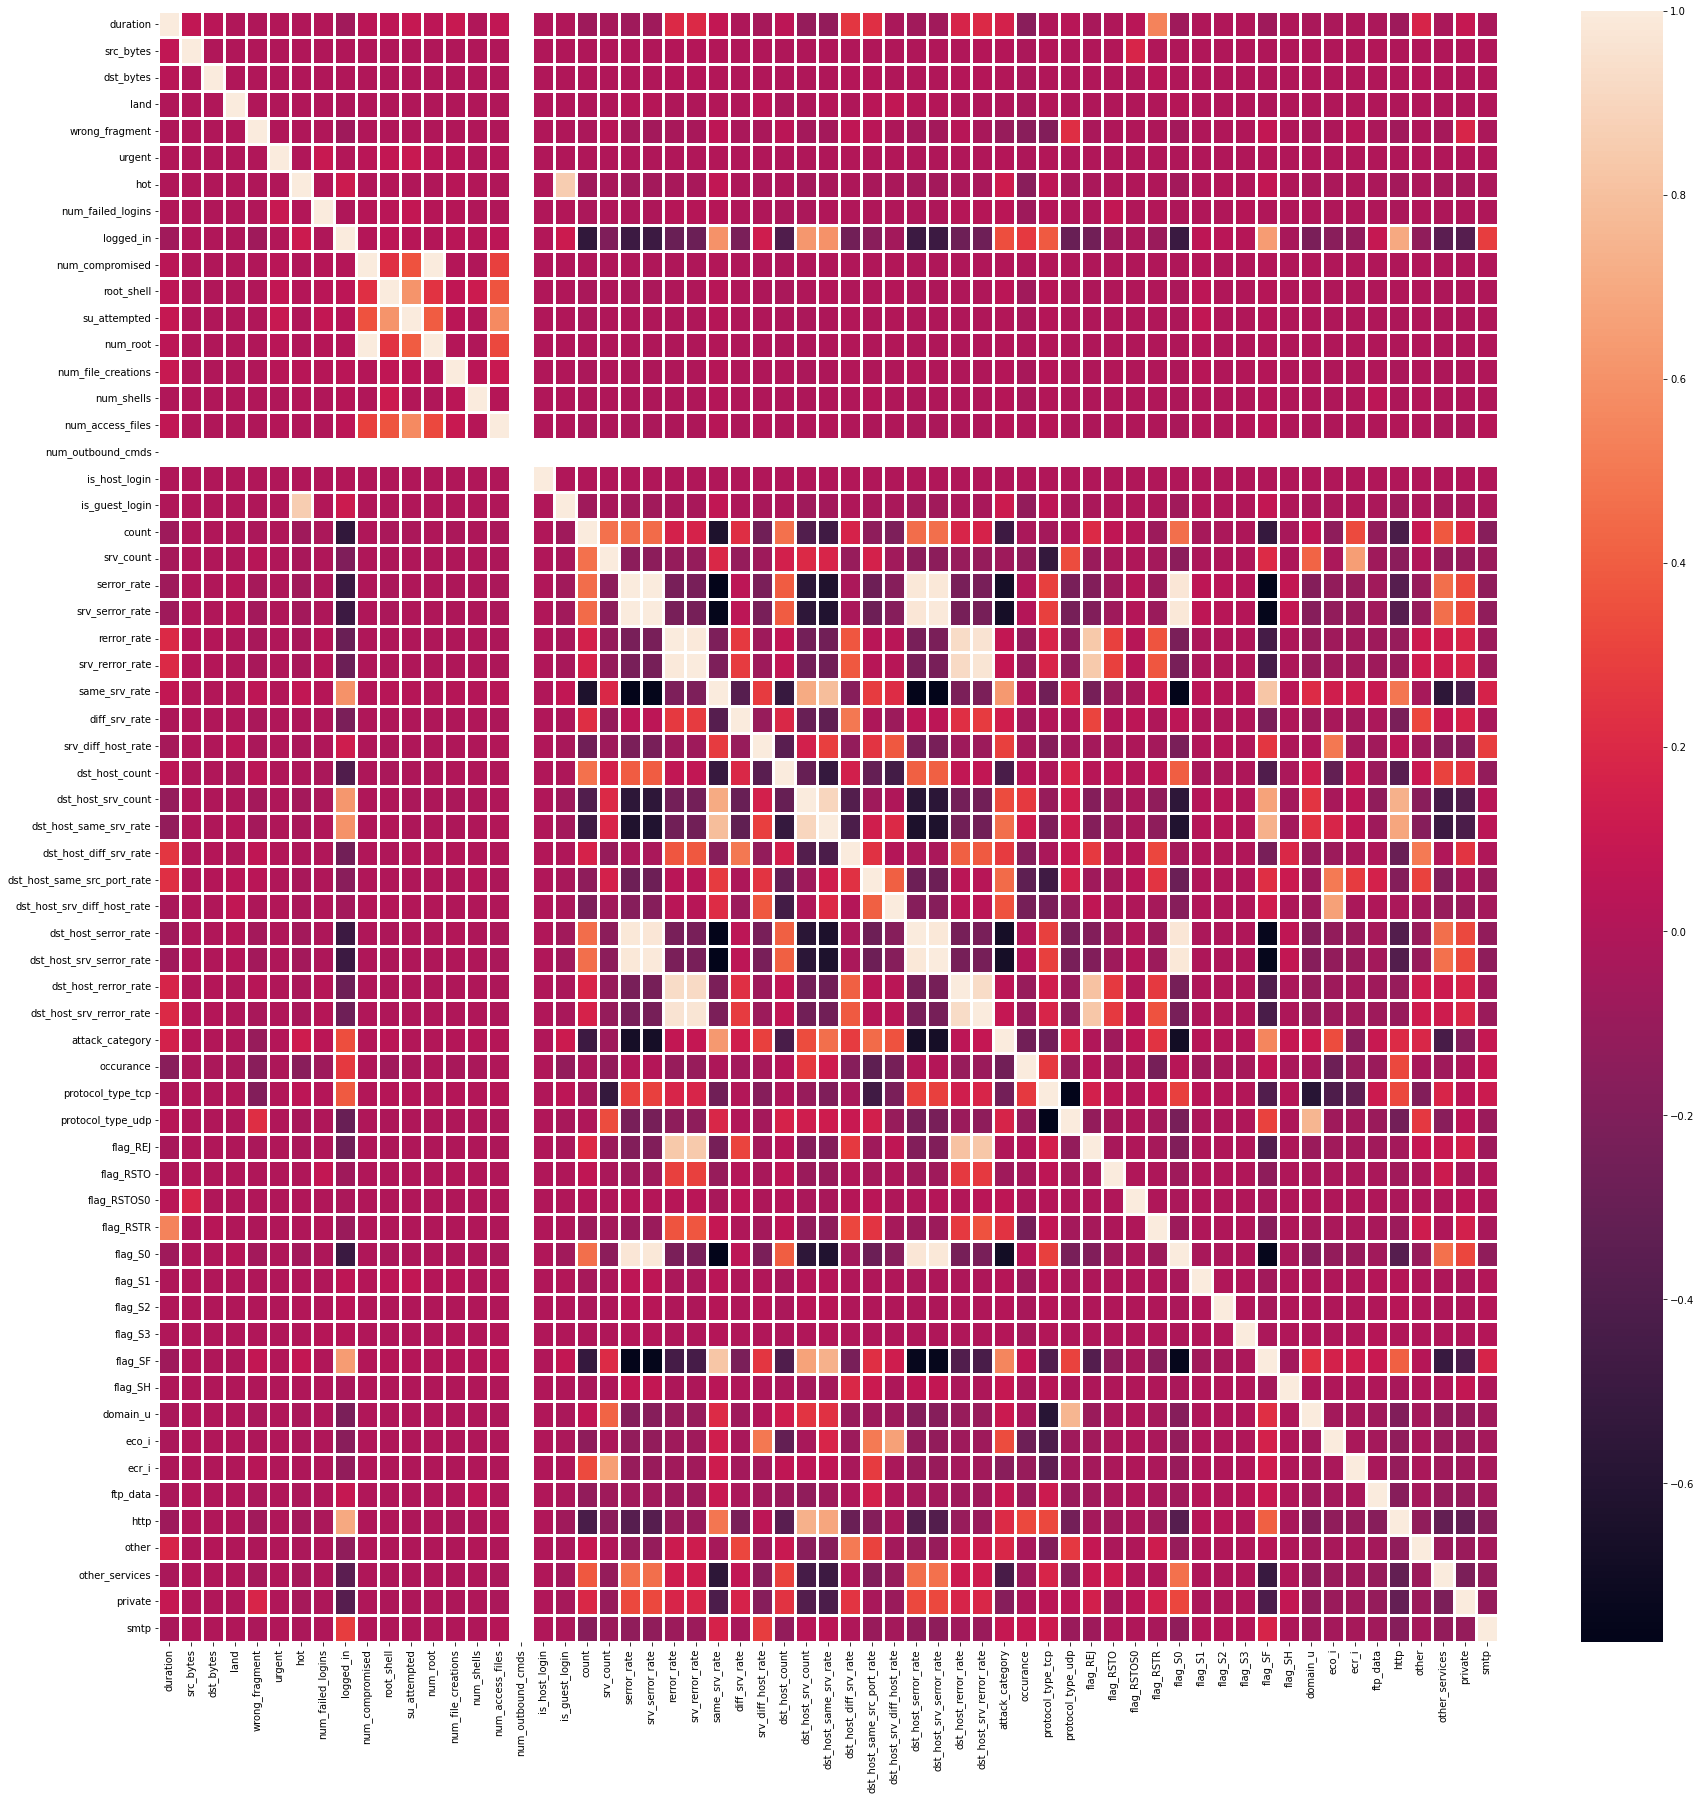

In [68]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), linewidth=3)
plt.show()


In [39]:
X = df.drop('attack_category',axis=1)                 # All this to avoid overfitting and using these it Algoritham
y = df['attack_category']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,y_train.shape

((88181, 60), (88181,))

In [40]:
X_train.shape

(88181, 60)

In [41]:
X_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance,protocol_type_tcp,protocol_type_udp,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,domain_u,eco_i,ecr_i,ftp_data,http,other,other_services,private,smtp
81433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,82,15,1.0,1.0,0.0,0.0,0.18,0.07,0.0,255,15,0.06,0.05,0.00,0.00,1.0,1.0,0.00,0.0,18,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15397,0,259,448,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10,10,0.0,0.0,0.0,0.0,1.00,0.00,0.0,45,255,1.00,0.00,0.02,0.04,0.0,0.0,0.00,0.0,21,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
49130,0,338,3516,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,34,34,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,21,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
114912,0,490,4997,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,14,14,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,21,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
50858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,1.00,0.00,0.0,66,52,0.79,0.08,0.02,0.00,0.0,0.0,0.79,1.0,21,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [42]:
X_test.shape

(37792, 60)

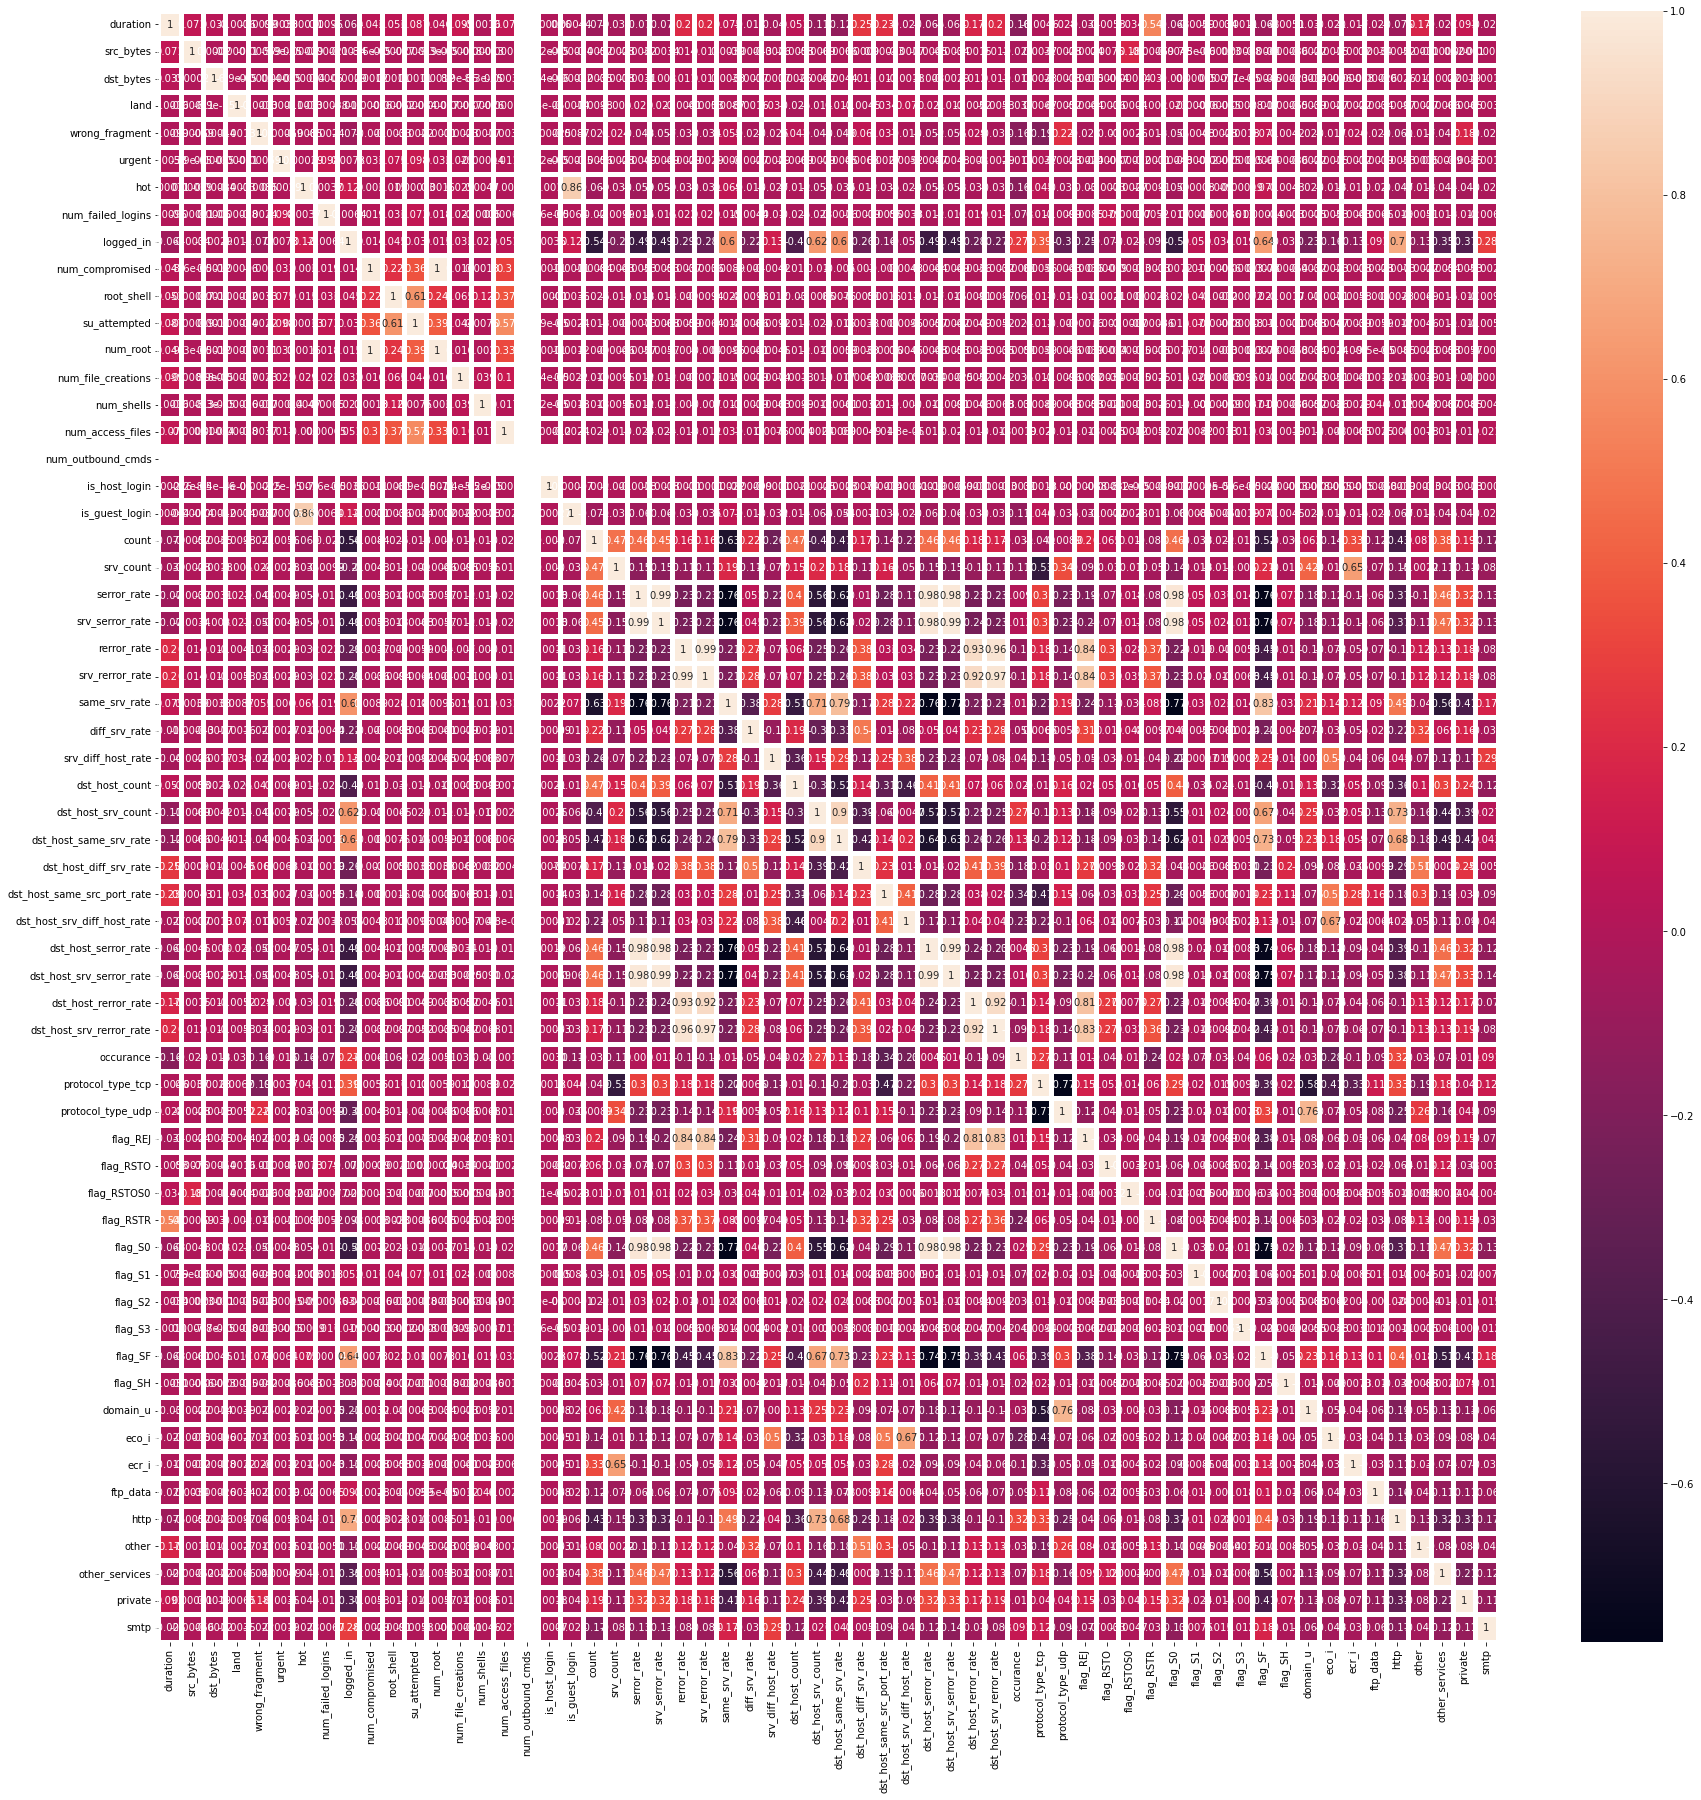

In [73]:
# concatenated_df = pd.concat([X_train, y_train], ignore_index=True)
# corr = concatenated_df.corr()
#Remove those features that are highly corelated with each other


# plt.figure(figsize=(30,20))
# corr = df.drop('attack_category', axis=1).corr()
# top_features = corr.index
# sns.heatmap(df[top_features].corr(), linewidth=5,annot = True)
# plt.show()










plt.figure(figsize=(30,30))
corr = X_train.corr()
top_features = corr.index
sns.heatmap(df[top_features].corr(), linewidth=5,annot = True)
plt.show()

In [43]:
threshold = 0.5

In [44]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of correlated columns 
    corr_matrix = dataset.corr() 
    for i in range(len(corr_matrix.columns)):
        for j in range(i): 
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value 
                colname = corr_matrix.columns[i]# getting the name of column 
                col_corr.add(colname) 
    return col_corr

In [45]:
# correlation( df.drop('attack_category', axis=1), threshold)
correlation( X_train, threshold)

{'count',
 'domain_u',
 'dst_host_count',
 'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'eco_i',
 'ecr_i',
 'flag_REJ',
 'flag_RSTR',
 'flag_S0',
 'flag_SF',
 'http',
 'is_guest_login',
 'num_access_files',
 'num_root',
 'other',
 'other_services',
 'protocol_type_tcp',
 'protocol_type_udp',
 'same_srv_rate',
 'srv_rerror_rate',
 'srv_serror_rate',
 'su_attempted'}

In [46]:
new_df = df.drop(['count',
 'domain_u',
 'dst_host_count',
 'dst_host_rerror_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_serror_rate',
 'eco_i',
 'ecr_i',
 'flag_REJ',
 'flag_RSTR',
 'flag_S0',
 'flag_SF',
 'http',
 'is_guest_login',
 'num_access_files',
 'num_root',
 'other',
 'other_services',
 'protocol_type_tcp',
 'protocol_type_udp',
 'same_srv_rate',
 'srv_rerror_rate',
 'srv_serror_rate',
 'su_attempted'], axis=1)

In [47]:
new_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_file_creations,num_shells,num_outbound_cmds,is_host_login,srv_count,serror_rate,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack_category,occurance,flag_RSTO,flag_RSTOS0,flag_S1,flag_S2,flag_S3,flag_SH,ftp_data,private,smtp
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.00,0.00,0.03,0.17,0.00,1,20,0,0,0,0,0,0,1,0,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.15,0.00,0.60,0.88,0.00,1,15,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1.0,0.0,0.07,0.00,0.05,0.00,0.00,0,19,0,0,0,0,0,0,0,1,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,5,0.2,0.0,0.00,0.00,0.00,0.03,0.04,1,21,0,0,0,0,0,0,0,0,0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,32,0.0,0.0,0.00,0.09,0.00,0.00,0.00,1,21,0,0,0,0,0,0,0,0,0


In [48]:
new_df.shape

(125973, 34)

# Train Decision Tree Classification model

In [49]:
## Note Always do prepruning for your decision Tree classification model

In [50]:
X = new_df.drop('attack_category',axis=1)                 
y = new_df['attack_category']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape,y_train.shape

((88181, 33), (88181,))

In [51]:
parameters = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[5,6,7,8],
    'max_features':['auto','sqrt','log2']
}

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
treemodel = DecisionTreeClassifier()
cv = GridSearchCV(treemodel,param_grid=parameters,cv=5,scoring='accuracy')

In [54]:
cv.fit(X_train,y_train)

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "D:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
D:\anaconda3\lib\sit

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [55]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'splitter': 'best'}

In [56]:
cv.predict(X_test) # To check overfitting if all zeros/one's/two's then overfitting occured in this case there will be no overfitting

array([1, 1, 1, ..., 1, 0, 1])

In [57]:
DTC_Model =DecisionTreeClassifier(criterion= 'gini', max_depth=9, max_features='sqrt',splitter='best')
                 # DTC_Model =DecisionTreeClassifier(criterion= 'gini', max_depth=10, max_features='sqrt',splitter='best')
DTC_Model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, max_features='sqrt')

In [58]:
y_pred = DTC_Model.predict(X_test)  # remeber Mistake always do prediction on X_test not X_train 

In [59]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [60]:
         # use confusion metrix to check the accuracy
confusion_matrix(y_test,y_pred)

array([[13642,    69,    17,     0,     0],
       [   14, 20087,    19,    41,     0],
       [   56,    72,  3424,     2,     3],
       [    0,    46,     0,   282,     2],
       [    0,     0,     1,     0,    15]], dtype=int64)

In [61]:
score = accuracy_score(y_pred,y_test)

In [62]:
score

0.9909504657070279

In [63]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13712
           1       1.00      0.99      0.99     20274
           2       0.96      0.99      0.98      3461
           3       0.85      0.87      0.86       325
           4       0.94      0.75      0.83        20

    accuracy                           0.99     37792
   macro avg       0.95      0.92      0.93     37792
weighted avg       0.99      0.99      0.99     37792



In [64]:
from sklearn import tree
independent_columns = df.drop(['attack_category'],axis=1)
dependent_column = df['attack_category']

[Text(0.6241517857142858, 0.95, 'X[8] <= 0.5\ngini = 0.572\nsamples = 88181\nvalue = [32199, 47182, 8099, 665, 36]'),
 Text(0.36723214285714284, 0.85, 'X[16] <= 0.795\ngini = 0.561\nsamples = 53270\nvalue = [31550, 13637, 8032, 48, 3]'),
 Text(0.27875, 0.75, 'X[22] <= 0.245\ngini = 0.64\nsamples = 28900\nvalue = [7445, 13564, 7844, 44, 3]'),
 Text(0.20035714285714284, 0.65, 'X[31] <= 0.5\ngini = 0.611\nsamples = 25419\nvalue = [7398, 13168, 4807, 43, 3]'),
 Text(0.12571428571428572, 0.55, 'X[19] <= 0.005\ngini = 0.509\nsamples = 19455\nvalue = [5166, 12499, 1744, 43, 3]'),
 Text(0.07, 0.45, 'X[0] <= 0.5\ngini = 0.579\nsamples = 14924\nvalue = [5118, 8043, 1720, 40, 3]'),
 Text(0.04285714285714286, 0.35, 'X[15] <= 2.5\ngini = 0.579\nsamples = 13083\nvalue = [5118, 6654, 1276, 33, 2]'),
 Text(0.022857142857142857, 0.25, 'X[17] <= 0.105\ngini = 0.476\nsamples = 5193\nvalue = [420, 3537, 1201, 33, 2]'),
 Text(0.011428571428571429, 0.15, 'X[23] <= 8.5\ngini = 0.157\nsamples = 2534\nvalue = 

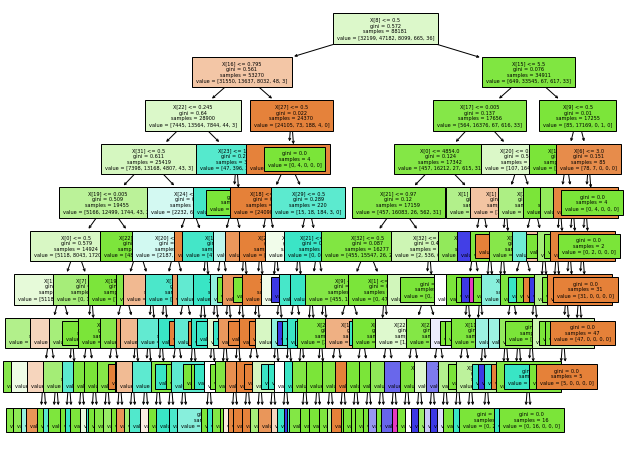

In [96]:
plt.figure(figsize=(10, 8))
                                 # feature_names=independent_columns ,class_names=dependent_column,
tree.plot_tree(DTC_Model, filled=True, fontsize=5)

# Feature Scaling

In [65]:
new_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_file_creations,num_shells,num_outbound_cmds,is_host_login,srv_count,serror_rate,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack_category,occurance,flag_RSTO,flag_RSTOS0,flag_S1,flag_S2,flag_S3,flag_SH,ftp_data,private,smtp
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.0,0.0,0.00,0.00,0.03,0.17,0.00,1,20,0,0,0,0,0,0,1,0,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,0.15,0.00,0.60,0.88,0.00,1,15,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1.0,0.0,0.07,0.00,0.05,0.00,0.00,0,19,0,0,0,0,0,0,0,1,0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,5,0.2,0.0,0.00,0.00,0.00,0.03,0.04,1,21,0,0,0,0,0,0,0,0,0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,32,0.0,0.0,0.00,0.09,0.00,0.00,0.00,1,21,0,0,0,0,0,0,0,0,0


In [66]:
new_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_file_creations,num_shells,num_outbound_cmds,is_host_login,srv_count,serror_rate,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack_category,occurance,flag_RSTO,flag_RSTOS0,flag_S1,flag_S2,flag_S3,flag_SH,ftp_data,private,smtp
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.012669,0.000413,0.0,0.000008,27.737888,0.284485,0.119958,0.063053,0.097322,0.082951,0.148379,0.032542,0.744985,19.504060,0.012399,0.000818,0.002897,0.001008,0.000389,0.002151,0.054456,0.173474,0.058052
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.483935,0.022181,0.0,0.002817,72.635840,0.446456,0.320436,0.180314,0.259830,0.188922,0.308997,0.112564,0.653748,2.291503,0.110661,0.028583,0.053750,0.031736,0.019719,0.046332,0.226916,0.378658,0.233843
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,18.000000,1.000000,0.000000,0.060000,0.000000,0.070000,0.060000,0.020000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,43.000000,2.000000,0.0,1.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
new_df.shape

(125973, 34)

In [68]:
scaler = StandardScaler()  # Scale the data
new_df2 = new_df['attack_category']
new_df = new_df.drop('attack_category',axis =1)
# columns_to_scale = ['duration', 'src_bytes', 'dst_bytes','hot','num_compromised','num_file_creations','srv_count','occurance']


In [69]:
scaled_df = scaler.fit_transform(new_df)
df3 = pd.DataFrame(scaled_df, columns = new_df.columns)
df3.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_file_creations,num_shells,num_outbound_cmds,is_host_login,srv_count,serror_rate,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,occurance,flag_RSTO,flag_RSTOS0,flag_S1,flag_S2,flag_S3,flag_SH,ftp_data,private,smtp
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,-0.354343,-0.637209,-0.374362,-0.349683,-0.374560,-0.280282,0.069972,-0.289103,0.216426,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,4.166943,-0.458130,-0.248254
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,-0.368110,-0.637209,-0.374362,0.482201,-0.374560,2.736852,2.367737,-0.289103,-1.965556,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,-0.239984,-0.458130,-0.248254
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,-0.299273,1.602664,-0.374362,0.038529,-0.374560,-0.174417,-0.480197,-0.289103,-0.219970,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,-0.239984,2.182788,-0.248254
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,-0.313041,-0.189235,-0.374362,-0.349683,-0.374560,-0.439078,-0.383108,0.066252,0.652823,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,-0.239984,-0.458130,-0.248254
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,0.058678,-0.637209,-0.374362,-0.349683,-0.028179,-0.439078,-0.480197,-0.289103,0.652823,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,-0.239984,-0.458130,-0.248254


In [70]:
new_df4 = pd.concat([df3, new_df2], axis=1)

In [71]:
new_df4.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_file_creations,num_shells,num_outbound_cmds,is_host_login,srv_count,serror_rate,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,occurance,flag_RSTO,flag_RSTOS0,flag_S1,flag_S2,flag_S3,flag_SH,ftp_data,private,smtp,attack_category
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,-0.354343,-0.637209,-0.374362,-0.349683,-0.374560,-0.280282,0.069972,-0.289103,0.216426,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,4.166943,-0.458130,-0.248254,1
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,-0.368110,-0.637209,-0.374362,0.482201,-0.374560,2.736852,2.367737,-0.289103,-1.965556,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,-0.239984,-0.458130,-0.248254,1
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,-0.299273,1.602664,-0.374362,0.038529,-0.374560,-0.174417,-0.480197,-0.289103,-0.219970,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,-0.239984,2.182788,-0.248254,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,-0.313041,-0.189235,-0.374362,-0.349683,-0.374560,-0.439078,-0.383108,0.066252,0.652823,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,-0.239984,-0.458130,-0.248254,1
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,0.058678,-0.637209,-0.374362,-0.349683,-0.028179,-0.439078,-0.480197,-0.289103,0.652823,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,-0.239984,-0.458130,-0.248254,1


In [72]:
# scaling is completed


# KNN Classification

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors': [13, 15, 17, 19, 21]}

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Validation accuracy: ", grid_search.best_score_)

In [ ]:
# prdict value of k using elbow method

In [74]:
# Split the data into training and testing sets
X = df3
y = new_df2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [75]:
knn = KNeighborsClassifier(n_neighbors=13)

In [76]:
# Train the model using the fit method
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [77]:
y_pred= knn.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [78]:
         # use confusion metrix to check the accuracy
confusion_matrix(y_test,y_pred)

array([[13677,    40,    11,     0,     0],
       [   27, 20091,    38,     5,     0],
       [    9,    41,  3507,     0,     0],
       [    3,    30,     7,   290,     0],
       [    0,     7,     2,     0,     7]], dtype=int64)

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9941786621507197


In [80]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13716
           1       1.00      0.99      1.00     20209
           2       0.99      0.98      0.98      3565
           3       0.88      0.98      0.93       295
           4       0.44      1.00      0.61         7

    accuracy                           0.99     37792
   macro avg       0.86      0.99      0.90     37792
weighted avg       0.99      0.99      0.99     37792



# ANN Classification Model

In [81]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [82]:
X = new_df4.drop(['attack_category'], axis=1)
y = new_df4['attack_category']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=500)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10,), max_iter=500)

In [85]:
y_pred = clf.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# # print("Precision:", precision)
# print("Recall:", recall)
# print("F1-score:", f1)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     13857
           1       0.99      1.00      0.99     20008
           2       0.98      0.97      0.98      3581
           3       0.96      0.92      0.94       341
           4       0.24      0.80      0.36         5

    accuracy                           0.99     37792
   macro avg       0.83      0.94      0.85     37792
weighted avg       0.99      0.99      0.99     37792



In [86]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.992114733276884


In [87]:
         # use confusion metrix to check the accuracy
cm = confusion_matrix(y_test,y_pred)
cm

array([[13780,    30,    14,     1,     0],
       [   62, 19917,    85,    18,     1],
       [   13,    49,  3478,     0,     0],
       [    1,    10,     1,   315,     0],
       [    1,     2,     3,     7,     4]], dtype=int64)

# K Means Clustring

D:\probability\stat-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\probability\stat-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\probability\stat-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\probability\stat-env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\probability\stat-env\lib\site-packages\sklearn\cluster\_k

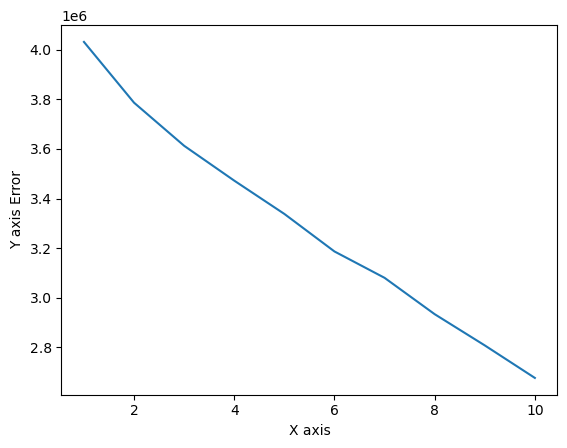

In [92]:
from sklearn.cluster import KMeans
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter =300, random_state=0)
    kmeans.fit(df3)
    sse.append(kmeans.inertia_)

# plot the sum of squared distances for each k value
plt.plot(range(1, 11), sse)
plt.xlabel('X axis')
plt.ylabel('Y axis Error')
plt.show()

In [93]:
new_df5 = new_df4.drop(['attack_category'], axis=1)

In [94]:
     # Finding the best value of k using elbow method 
     # Already founded value for KNN so ] = labels

In [95]:
new_df5.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,num_file_creations,num_shells,num_outbound_cmds,is_host_login,srv_count,serror_rate,rerror_rate,diff_srv_rate,srv_diff_host_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,occurance,flag_RSTO,flag_RSTOS0,flag_S1,flag_S2,flag_S3,flag_SH,ftp_data,private,smtp
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,-0.354343,-0.637209,-0.374362,-0.349683,-0.374560,-0.280282,0.069972,-0.289103,0.216426,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,4.166943,-0.458130,-0.248254
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,-0.368110,-0.637209,-0.374362,0.482201,-0.374560,2.736852,2.367737,-0.289103,-1.965556,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,-0.239984,-0.458130,-0.248254
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,-0.299273,1.602664,-0.374362,0.038529,-0.374560,-0.174417,-0.480197,-0.289103,-0.219970,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,-0.239984,2.182788,-0.248254
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,-0.313041,-0.189235,-0.374362,-0.349683,-0.374560,-0.439078,-0.383108,0.066252,0.652823,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,-0.239984,-0.458130,-0.248254
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.02618,-0.01861,0.0,-0.002817,0.058678,-0.637209,-0.374362,-0.349683,-0.028179,-0.439078,-0.480197,-0.289103,0.652823,-0.11205,-0.028606,-0.053906,-0.031767,-0.019726,-0.046432,-0.239984,-0.458130,-0.248254


In [96]:
# plt.figure(figsize =(10,8))
# sns.scatterplot(x='num_failed_logins', y='logged_in', hue='Labels', data=new_df5)

# # show the plot
# plt.show()

In [97]:
from sklearn.metrics import silhouette_score
# Checking the accuracy of model by finding Silhouette score and Inertial score
# calculate the Silhouette score
score = silhouette_score(new_df5.loc[:, :'Labels'], kmeans.labels_, metric='euclidean')
print(f'Silhouette score: {score:.3f}')

# calculate the Inertia score
# inertia = kmeans.inertia_
# print(f'Inertia score: {inertia:.3f}')

KeyError: 'Labels'